# Regression Models

Regression aims to estimate the world state $w$ for a given observations $\mathbf{x}$ by modeling $P(w|\mathbf{x})$ based on obtained data $\{\mathbf{x}_{i}, w_{i}\}_{i=1}^N$.

## Table of contents:
* [Maximum Likelihood Linear Regression](#ml-linear-regression)
* [Bayesian linear regression](#bayesian-linear-regression)
* [Non-linear regression - Maximum Likelihood](#non-linear-regression-ml)
* [Non-linear regression - Bayesian Inference](#non-linear-regression-bayes)
* [Kernels and Gaussian process regression](#kernel-gaussian-process-regression)
* [Sparse linear regression](#sparse-linear-regression)
* [Dual linear regression](#dual-linear-regression)
* [Relevance vector regression](#relevant-vector-regression)
* [Regression to multivariate data](#multivariate-data)

# Sparse linear regression <a class="anchor" id="sparse-linear-regression"></a>

Remind ouselves that the 1D student's t-distribution and gamma distribution have the following pdf.
$$\begin{align}
Stud_{x}(\mu, \sigma, \nu) \quad & = & \quad \frac{1}{(\nu \pi)^{1/2}\sigma}\frac{\Gamma[\frac{\nu+1}{2}]}{\Gamma[\frac{\nu}{2}]} \bigg(1+\frac{1}{\nu}\frac{(x - \mu)^{2}}{\sigma^{2}}\bigg)^{-\frac{\nu+1}{2}}\\
Gam_{h}(\alpha=\nu/2, \beta=\nu/2) \quad & = & \quad \frac{\beta^{\alpha}}{\Gamma(\alpha)}h^{\alpha - 1}exp(-\beta h)
\end{align}$$
Importantly, student's t-distribution can be expressed as a marginalized gaussian using a latent (hidden) variable $h$.
$$\begin{align}
Stud_{x}(0, 1, \nu) \quad & = & \quad \int Norm_{\phi}(0, 1/h)Gam_{h}(\nu/2, \nu/2)dh 
\end{align}$$
We may form a prior for $\mathbf{\phi} = (\phi_{1}, \cdots, \phi_{D})^{T}$.
$$\begin{align}
prior :\qquad p(\mathbf{\phi}) \quad & = & \quad \prod_{d=1}^{D}Stud_{\phi_{d}}(0, 1, \nu)\\
\quad & = & \quad \prod_{d=1}^{D} \frac{\Gamma[\frac{\nu+1}{2}]}{(\nu \pi)^{1/2}\Gamma[\frac{\nu}{2}]} \bigg(1+\frac{\phi_{d}^{2}}{\nu}\bigg)^{-\frac{\nu+1}{2}}\\
 \quad & = & \quad \prod_{d=1}^{D} \int Norm_{\phi_{d}}(0, 1/h_{d})Gam_{h_{d}}(\nu/2, \nu/2)dh_{d}\\
 \quad & = & \quad \int Norm_{\mathbf{\phi}}(0, \mathbf{H}^{-1})\prod_{d=1}^{D} Gam_{h_{d}}(\nu/2, \nu/2)d\mathbf{H} \qquad \mathbf{H} = diag(h_{1}, \cdots, h_{D})
\end{align}$$

In order to incorporate the sparsity, one can replace the gaussian prior with the student's t prior as shown above.
$$\begin{align}
p(\phi|\mathbf{X}, \mathbf{w}, \sigma) \quad & = &\quad \frac{p(\mathbf{w}|\mathbf{X}, \phi, \sigma)p(\phi)}{p(\mathbf{w}|\mathbf{X})}
\end{align}$$
Here, $\mathbf{x}_{i} = (1, \tilde{\mathbf{x}}_{i}^{T})^{T}$, $\mathbf{X} = (\mathbf{x}_{1}, \cdots, \mathbf{x}_{N})$, $\mathbf{w} = (w_{1}, \cdots, w_{N})^{T}$ and $\Theta = (\phi_{0}, \phi_{1}, \cdot, \phi_{D}, \sigma)$.
<br>
The likelihood is 
$$\begin{align}
p(\mathbf{w}|\mathbf{X}, \phi, \sigma) \quad & = & \quad Norm_{\mathbf{w}}(\mathbf{X}^{T}\phi, \sigma\mathbf{I}_{N \times N}) \quad & = &\quad  \#
exp \bigg(-\frac{(\mathbf{w} - \mathbf{X}^{T}\phi)^{T}(\mathbf{w} - \mathbf{X}^{T}\phi)}{2\sigma^{2}} \bigg)
\end{align}$$

Again, just for a clarification.
$$\begin{align}
\mathbf{X} \quad & : &\quad (D \times N)\\
\mathbf{w} \quad & : &\quad (N \times 1)\\
\mathbf{\phi} \quad & : &\quad (D \times 1)
\end{align}$$

Let us compute the maginalized likelihood with respect to $\mathbf{\phi}$.
$$\begin{align}
p(\mathbf{w}|\mathbf{X}, \sigma)
\quad & = & \quad \int d\mathbf{\phi} p(\mathbf{w}, \mathbf{\phi}|\mathbf{X}, \sigma)\\
\quad & = & \quad \int d\mathbf{\phi} p(\mathbf{w}|\mathbf{X}, \mathbf{\phi}, \sigma)p(\phi)\\
\quad & = & \quad \int Norm_{\mathbf{w}}(\mathbf{X}^{T}\mathbf{\phi}, \sigma\mathbf{I}_{N \times N}) Norm_{\mathbf{\phi}}(0, \mathbf{H}^{-1})\prod_{d=1}^{D} Gam_{h_{d}}(\nu/2, \nu/2)d\mathbf{H}d\mathbf{\phi}\\
\quad & = & \quad \int Norm_{\mathbf{w}}(\mathbf{0}, \mathbf{X}^{T}\mathbf{H}^{-1}\mathbf{X} + \sigma^{2}\mathbf{I}_{N \times N})\prod_{d=1}^{D} Gam_{h_{d}}(\nu/2, \nu/2)d\mathbf{H}\\
\end{align}$$

After introducing the latent variables $h_{1}, \cdots, h_{D}$, the maximum likelihood estimation for $\mathbf{\phi}$ and $\sigma$ can now be solved with EM algorithm. Namely,
(1)compute the posteriror 
(2)maximize the marginalized likelihood using the obtained posterior $h_{1}, \cdots, h_{D}$.
$$\begin{align}
\tilde{h}_{1}, \cdots, \tilde{h}_{D}, \tilde{\sigma} \quad & = & \quad argmax_{h_{1}, \cdots, h_{D}, \sigma } \, \bigg[ \int Norm_{\mathbf{w}}(\mathbf{0}, \mathbf{X}^{T}\mathbf{H}^{-1}\mathbf{X} + \sigma^{2}\mathbf{I}_{N \times N})\prod_{d=1}^{D} Gam_{h_{d}}(\nu/2, \nu/2)d\mathbf{H}\bigg]\\
\quad & \approx & \quad  argmax_{h_{1}, \cdots, h_{D}, \sigma } \, \bigg[ Norm_{\mathbf{w}}(\mathbf{0}, \mathbf{X}^{T}\mathbf{H}^{-1}\mathbf{X} + \sigma^{2}\mathbf{I}_{N \times N})\prod_{d=1}^{D} Gam_{h_{d}}(\nu/2, \nu/2) \bigg]\\
\quad & \equiv & \quad  argmax_{h_{1}, \cdots, h_{D}, \sigma^{2} } \,\bigg[exp\big(-L(\mathbf{h}, \sigma^{2})\big)\bigg]
\end{align}$$

Let us write down explicitly the argument.
$$\begin{align}
exp\big(-L(\mathbf{h}, \sigma^{2})\big) \quad & = & \quad  \frac{1}{\sqrt{(2\pi)^{N}det(\mathbf{X}^{T}\mathbf{H}^{-1}\mathbf{X} + \sigma^{2}\mathbf{I}_{N \times N})}}exp\bigg(-\frac{1}{2}\mathbf{w}^{T}\big(\mathbf{X}^{T}\mathbf{H}^{-1}\mathbf{X} + \sigma^{2}\mathbf{I}_{N \times N}\big)^{-1}\mathbf{w}\bigg)\\
 \quad &  & \quad  \qquad \times\prod_{d=1}^{D} \frac{\beta^{\alpha}}{\Gamma(\alpha)}h_{d}^{\alpha - 1}exp(-\beta h_{d})\bigg|_{\alpha = \nu/2, \beta = \nu/2}
\end{align}$$

Let us work on component by component.

First:
Using the following relation,
$$\begin{align}
A^{-1} - A^{-1}B(D + CAB)^{-1}CA^{-1} \quad & = & \quad (A + BD^{-1}C)^{-1}
\end{align}$$
the following will be
$$\begin{align}
\big(\mathbf{X}^{T}\mathbf{H}^{-1}\mathbf{X} + \sigma^{2}\mathbf{I}_{N \times N}\big)^{-1} \quad & = & \quad \frac{1}{\sigma^{2}}\mathbf{I}_{N \times N} - \frac{1}{\sigma^{4}}\mathbf{X}^{T}(\frac{1}{\sigma^{2}}\mathbf{X}\mathbf{X}^{T} + \mathbf{H}\big)^{-1}\mathbf{X}\\
\quad & \equiv & \quad \frac{1}{\sigma^{2}}\mathbf{I}_{N \times N} - \frac{1}{\sigma^{4}}\mathbf{X}^{T}\mathbf{\Phi}^{-1}\mathbf{X}\\
\quad & = & \quad \frac{1}{\sigma^{2}}\mathbf{I}_{N \times N} - \bigg( \frac{1}{\sigma^{2}}\mathbf{\Phi}^{-1}\mathbf{X}\bigg)^{T}\mathbf{\Phi}\bigg( \frac{1}{\sigma^{2}}\mathbf{\Phi}^{-1}\mathbf{X}\bigg)\\
\mathbf{\Phi} \quad & = & \quad \frac{1}{\sigma^{2}}\mathbf{X}\mathbf{X}^{T} + \mathbf{H}
\end{align}$$

Next:
$$\begin{align}
X \quad & = & \quad U_{D \times D}\tilde{\mathbf{X}}V_{N \times N}\\
det(\mathbf{X}^{T}\mathbf{H}^{-1}\mathbf{X} + \sigma^{2}\mathbf{I}_{N \times N}) \quad & = & \quad det(\tilde{\mathbf{X}}^{T}\mathbf{H}^{-1}\tilde{\mathbf{X}} + \sigma^{2}\mathbf{I}_{N \times N})\\
\quad & = & \quad \bigg[\prod_{d=1}^{D}\frac{\chi_{d}^2}{h_{d}} + \sigma^{2}\bigg]\sigma^{2(N-D)}\\
\quad & = & \quad \bigg[\prod_{d=1}^{D} h_{d}^{-1}\quad\prod_{d=1}^{D}\frac{\chi_{d}^2}{\sigma^{2}} + h_{d}\bigg]\sigma^{2N}\\
\quad & = & \quad det(\mathbf{H}^{-1})det(\mathbf{\Phi})det(\sigma^{2}\mathbf{I}_{N \times N})
\end{align}$$

<br>
<br>
<br>
$$\begin{align}
log det K = Tr log K
\end{align}$$
<br>
<br>
<br>

$$\begin{align}
-L(\mathbf{h}, \sigma^{2}) \quad & = & \quad  -\frac{N}{2}log(2\pi) + \frac{1}{2}\sum_{d=1}^{D}log(h_{d})  - \frac{1}{2}\sum_{d=1}^{D}log\bigg(\frac{\chi_{d}^2}{\sigma^{2}} + h_{d}\bigg) - \frac{N}{2}log(\sigma^{2})\\
 \quad &  & \quad -\frac{1}{2}\frac{\mathbf{w}^{T}\mathbf{w}}{\sigma^{2}}  +\frac{1}{2}\bigg( \frac{1}{\sigma^{2}}\mathbf{\Phi}^{-1}\mathbf{X}\mathbf{w}\bigg)^{T}\mathbf{\Phi}\bigg( \frac{1}{\sigma^{2}}\mathbf{\Phi}^{-1}\mathbf{X}\mathbf{w}\bigg)\\
\quad &  & \quad + D log \bigg(\frac{\beta^{\alpha}}{\Gamma(\alpha)}\bigg) + \sum_{d=1}^{D} (\alpha - 1)log(h_{d}) -\beta h_{d} \bigg|_{\alpha = \nu/2, \beta = \nu/2}
\end{align}$$

$$\begin{align}
\frac{1}{\sigma^{4}}\mathbf{w}^{T}\mathbf{X}^{T}\mathbf{\Phi}^{-1}\mathbf{\Phi}\mathbf{\Phi}^{-1}\mathbf{X}\mathbf{w} \quad & = & \quad \frac{1}{\sigma^{4}}\mathbf{w}^{T}\mathbf{V}^{T}\tilde{\mathbf{X}}^{T}\mathbf{U}^{T}\mathbf{\Phi}^{-1}\mathbf{U}\mathbf{U}^{T}\mathbf{\Phi}\mathbf{U}\mathbf{U}^{T}\mathbf{\Phi}^{-1}\mathbf{U}\tilde{\mathbf{X}}\mathbf{V}\mathbf{w} \\
\quad & = & \quad \bigg(\frac{1}{\sigma^{2}}\mathbf{w}^{T}\mathbf{V}^{T}\tilde{\mathbf{X}}^{T}\tilde{\mathbf{\Phi}}^{-1}\bigg)\tilde{\mathbf{\Phi}}\bigg(\frac{1}{\sigma^{2}}\tilde{\mathbf{\Phi}}^{-1}\tilde{\mathbf{X}}\mathbf{V}\mathbf{w}\bigg)\\
\quad & = & \quad \tilde{\mathbf{\mu}}^{T}\tilde{\mathbf{\Phi}}\tilde{\mathbf{\mu}}\\
\quad & = & \quad \bigg(\frac{1}{\sigma^{2}}\mathbf{w}^{T}\mathbf{V}^{T}\tilde{\mathbf{X}}^{T}\bigg)\tilde{\mathbf{\Phi}}^{-1}\bigg(\frac{1}{\sigma^{2}}\tilde{\mathbf{X}}\mathbf{V}\mathbf{w}\bigg)\\
\quad & = & \quad \tilde{\mathbf{\delta}}^{T}\tilde{\mathbf{\Phi}}^{-1}\tilde{\mathbf{\delta}}
\end{align}$$

We may drop constants,
$$\begin{align}
- L(\mathbf{h}, \sigma^{2}) \quad & = & \quad  \sum_{d=1}^{D} \bigg[\frac{\nu - 1}{2}log(h_{d})  - \frac{1}{2}log\bigg(\frac{\chi_{d}^2}{\sigma^{2}} + h_{d}\bigg) - \frac{\nu}{2} h_{d}\bigg]- \frac{N}{2}log(\sigma^{2})
-\frac{1}{2}\frac{\mathbf{w}^{T}\mathbf{w}}{\sigma^{2}}  +\frac{1}{2}\mathbf{\mu}^{T}\mathbf{\Sigma}^{-1}\mathbf{\mu}\\
\quad & = & \quad  \sum_{d=1}^{D} \bigg[\frac{\nu - 1}{2}log(h_{d})  - \frac{1}{2}log(\tilde{\Phi}_{dd}) - \frac{\nu}{2} h_{d}\bigg]- \frac{N}{2}log(\sigma^{2})
-\frac{1}{2}\frac{\mathbf{w}^{T}\mathbf{w}}{\sigma^{2}} + \frac{1}{2}\frac{\tilde{\delta}_{d}^{2}}{\tilde{\Phi}_{dd}}\\
\end{align}$$

Taking the derivative with respect to $h_{d}$ and equating the result with zero,

$$\begin{align}
\frac{\partial L(\mathbf{h}, \sigma^{2})}{\partial h_{d}} \quad & = & \quad \frac{\nu - 1}{h_{d}} - \frac{1}{\tilde{\Phi}_{dd}} - \nu - \frac{\tilde{\delta}_{d}^{2}}{\tilde{\Phi}_{dd}^{2}}\\
0 \quad & = & \quad \frac{\nu - 1}{h_{d}} - \tilde{\Sigma}_{dd} - \nu - \tilde{\mu}_{d}^{2}\\
h_{d} \quad & = & \quad \frac{\nu - 1 - h_{d}\tilde{\Sigma}_{dd}}{\tilde{\mu}_{d}^{2} + \nu}\\
h_{d} \quad & = & \quad \frac{\nu + 1 - h_{d}\Sigma_{dd}}{\mu_{d}^{2} + \nu}\\
\end{align}$$

<br>
<br>
<br>
$$\begin{align}
log det K = Tr log K
\end{align}$$
<br>
<br>
<br>


$$\begin{align}
\frac{1}{\sigma^{2}}\mathbf{\Phi}^{-1}\mathbf{X}\mathbf{w}\\
\mathbf{\Sigma} \quad & = & \quad \mathbf{\Phi}^{-1}\\
\mathbf{\Phi} \quad & = & \quad \frac{1}{\sigma^{2}}\mathbf{X}\mathbf{X}^{T} + \mathbf{H}
\end{align}$$



The parameters that maximize above is
$$\begin{align}
h_{d} \quad & \Leftarrow & \quad \frac{1 - h_{d}\Sigma_{dd} + \nu}{\mu_{d}^{2} + \nu}
\end{align}$$

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as spsp
import scipy.stats as spst
%matplotlib inline

# usual gangs

In [4]:
def generate_nice_params(D):
    """
    Arguments:
        D: dimension of the input. 

    Output:
        phi:  slope of the plane.

    """
    phi = np.random.rand(D) + 0.5
    phi[2] *= 0.1
    noise = np.random.rand()
    return phi, noise


def generate_samples(ns, phi, noise):
    """
    Arguments:
        nx:   scalar. number of points between xlim (-10. and +10.) -> grid.
        ns:   scalar. number of samples
        phi:  slope of the plane.
        x:    x coodinates of the grid.
    
    Output:
        bases:     The basis gaussians on the grid. (ng+1 x nx) 1 for bias.
        bases_smp: The basis gaussians sampled from the grid. (ng x ns) 
        grdtr:     The generated curve. ground truth. (1, ng)
        cntrs:     The centers of the gaussians. (ng, )
        xs:        sampled x (ns, ) 
        smp:       sampled from grdtr added with sg noise, (ns, )
        
    """
    xy1 = 16 * (np.random.rand(3, ns) - 0.5 )
    xy1[0] = 1
    grd = np.dot(phi[np.newaxis, :], xy1)
    smp = grd + np.random.normal(0, noise, ns)
    return xy1, grd, smp.T


def generate_colorscale(smp):
    """
    Arguments:
        smp:   sampled from grdtr added with sg noise, (ns, )
        
    Output:
        clrs:  color scale (3, ns)    
        
    """
    smpmax = smp.max()
    smpmin = smp.min()
    smpscaled = (smp - smpmin)/(smpmax - smpmin)
    clrs = np.hstack((1 - smpscaled, 1 - smpscaled, 0.8*smpscaled)).squeeze()
    return clrs


def plot_samples(x, wgt, bases, grdtr, xs, smp):
    """
    Arguments:
        x:     x coodinates of the grid.
        wgt:   weight distribution of the gaussians.  (ng+1, )
        bases: The basis gaussians on the grid. (ng+1 x nx) 1 for bias.
        grdtr: The generated curve. ground truth. (1, ng)
        xs:    sampled x. (ns, )
        smp:   sampled from grdtr (ns, )
    
    Output:
        plot of grdtr, wgt * bases, smp
        
    """
    for i in range(1, bases.shape[0]):
        plt.plot(x, wgt[i] * bases[i], '-')
    plt.plot(x, grdtr.squeeze(), 'k-', lw = 3)
    plt.plot(xs, smp.squeeze(), 'k.', markersize = 10)
    plt.xlabel("x")
    plt.ylabel("w")


def plot_lg_pdf(phi, nres):
    """
    Arguments:
        phi:  slope of the plane.
        nres:  resolution of the image.
    
    Output:
        plot.
    """
    D = phi.shape[0]
    if D == 3:
        nn = nres**2
        xres = np.linspace(-10, 10, nres)
        yres = np.linspace(-10, 10, nres)
        yg, xg = np.meshgrid(yres, xres)
        x_flat = xg.reshape(1, nn)
        y_flat = yg.reshape(1, nn)
        x1_flat = np.vstack((np.ones(nn), x_flat))
        xy1_flat = np.vstack((x1_flat, y_flat))
        z = np.dot(phi[np.newaxis, :], xy1_flat).reshape((nres, nres)).T
        z = np.fliplr(z)
        plt.imshow(z, extent=[-10, 10, -10, 10])
        plt.arrow(0, 0, 5*phi[1], 5*phi[2], head_width=0.5, head_length=1., fc='k', ec='k')
        return z
    elif D == 2:
        xres = np.linspace(-10, 10, nres)
        x1_flat = np.vstack((np.ones(nres), xres))
        z = np.dot(phi[np.newaxis, :], x1_flat)
        zrep = np.tile(z, (nres, 1))
        zrep = np.fliplr(zrep)
        plt.imshow(zrep, extent=[-10, 10, -10, 10])
        plt.arrow(0, 0, 5*phi[1], 0, head_width=0.5, head_length=1., fc='k', ec='k')
        return zrep
    else:
        print('We don''t cover such case here')


def alt_inv(A, B, C, D):
    """
    Ainv - Ainv * B * (D + C * A * B)inv * C * Ainv = (A + B * Dinv * C)inv
    A^{-1} - A^{-1}B(D + CAB)^{-1}CA^{-1} = (A + BD^{-1}C)^{-1}
    Arguments: 
        A: (N, N)
        B: (N, D)
        C: (D, N)
        D: (D, D)
    
    Output:
        invm: (N, N)
    """
    Ainv = np.linalg.inv(A)
    AinvB = np.dot(Ainv, B)
    CAinv = np.dot(C, Ainv)
    mid = D
    mid += np.dot(np.dot(C, A), B)
    midinv = np.linalg.inv(mid)
    invm = Ainv - np.dot(np.dot(AinvB, midinv), CAinv)
    return invm


def phiinv(x, w, sgs, hs):
    """
    Arguments:
        x:     bases_smp. z coodinates of the samp. (ng+1 x ns)
        w:     smp. sampled from grdtr added with sg noise, (ns, )
        sgs:   scalar. this std squared.
        hs:    latent variable h's (D,)
    
    Output:
        phiinv:  inverse of phi (D, D)
        
    """
    # x : D x N
    # w : N
    # phiinv : D x D
    D = x.shape[0]
    N = x.shape[1]
    if N >= D:
        phi = np.dot(x, x.T)
        phi /= sgs
        phi += np.diag(hs)
        phiinv = np.linalg.inv(phi)
    else:
        a = sgs * np.eye(N)
        b = x.T
        c = x
        d = np.diag(hs)
        phiinv = alt_inv(a, b, c, d)
    return phiinv


def e_step(xs, w, sgs, hs, nu):
    """
    Arguments:
        xs:    z star. (ng+1 x nres**2) D x N*
        w:     smp. sampled from grdtr added with sg noise, (ns, )
        sgs:   scalar. this std squared.
        hs:    latent variable h's (D,)
    
    Output:
        hnew:  updated hs. (D, )
        mu:    mu evaluated for each xs (D, 1)
        sgm:   cov evaluated for each xs (D, D)
        
    """
    # w = N x 1
    # xs = D x N
    # pinv = D x D
    # mu = N x 1
    # hnew = D x 1
    pinv = phiinv(xs, w, sgs, hs)
    sgma = pinv
    xw = np.dot(xs, w)
    mu = np.dot(pinv, xw)/sgs
    hnew = hs
    hnew[1:] = 1 + nu - hs[1:] * np.diag(sgma)[1:]
    hnew[1:] /= mu[1:].squeeze()**2 + nu
    return hnew, mu, sgma


def m_step(xs, w, hs, mu, sgma, D):
    dlt = w - np.dot(xs.T, mu)
    #denom = D
    #denom -= (1 - hs * np.diag(sgma)).sum()
    denom = (hs * np.diag(sgma)).sum()
    sgsnew = (dlt**2).sum()
    sgsnew /= denom
    return sgsnew


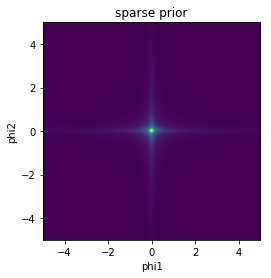

In [5]:
x = np.arange(-5, 5.1, .05)
nu = 0.01
tx = spst.t.pdf(x, nu, loc=0, scale=1)
txy = np.outer(tx, tx)

plt.imshow(txy, extent=[-5, 5, -5, 5])
plt.title('sparse prior')
plt.xlabel('phi1')
plt.ylabel('phi2')

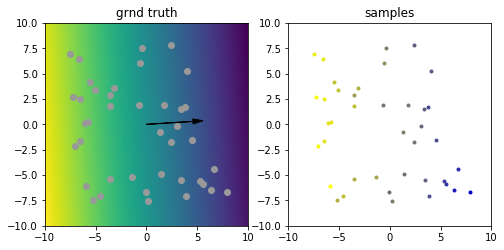

In [6]:
nres = 101
ns = 40
D = 3
phi, noise = generate_nice_params(D)
sgs = 1
hs = np.ones(D)
xs, grd, smp = generate_samples(ns, phi, noise)
clrs = generate_colorscale(smp)

plt.rcParams['figure.figsize'] = (8.0, 4.0)
plt.subplot(1,2,1)
z = plot_lg_pdf(phi, nres)
plt.scatter(xs[1], xs[2], color=(0.6, 0.6, 0.6))
plt.title('grnd truth')

plt.subplot(1,2,2)
for i in range(ns):
    plt.plot(xs[1, i], xs[2, i], '.', color=tuple(clrs[i]))
plt.axis('square')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.title('samples')


In [7]:
Nrep = 50
import copy
iniths = copy.deepcopy(hs)
for i in range(Nrep):
    temp = copy.deepcopy(hs)
    print('{} steps : {:1.4f}, {:1.4f}, {:1.4f}'.format(i, hs[0], hs[1], hs[2]))
    hs, mu, sgma = e_step(xs, smp, sgs, hs, nu)
    sgs = m_step(xs, smp, hs, mu, sgma, D)
    if np.max(np.abs(hs - temp)/temp) < 0.0001:
        print('that''s it')
        break
print('grnd truth of phi: {:1.4f}, {:1.4f}, {:1.4f}'.format(phi[0], phi[1], phi[2]))

0 steps : 1.0000, 1.0000, 1.0000
1 steps : 1.0000, 1.1427, 99.9704
2 steps : 1.0000, 1.6117, 4.4702
3 steps : 1.0000, 1.4724, 49.3924
4 steps : 1.0000, 1.2137, 47.4646
5 steps : 1.0000, 1.2859, 26.5495
6 steps : 1.0000, 1.3093, 35.4556
7 steps : 1.0000, 1.2721, 36.5256
8 steps : 1.0000, 1.2795, 33.8711
9 steps : 1.0000, 1.2850, 34.5191
10 steps : 1.0000, 1.2813, 34.8984
11 steps : 1.0000, 1.2812, 34.6256
12 steps : 1.0000, 1.2821, 34.6278
13 steps : 1.0000, 1.2818, 34.6893
14 steps : 1.0000, 1.2817, 34.6688
15 steps : 1.0000, 1.2818, 34.6614
16 steps : 1.0000, 1.2818, 34.6685
thats it
grnd truth of phi: 1.2922, 0.9181, 0.0582


In [11]:
xs_sel = xs[:2, :]
hs_sel = hs[:2]
_, mu_sel, sgma_sel = e_step(xs_sel, smp, sgs, hs_sel, nu)
mu_sel = mu_sel.squeeze()





print('inference of mu = [{:1.4f}, {:1.4f}]'.format(mu_sel[0], mu_sel[1]))

inference of mu = [0.5604, 0.8586]


Here, we should eliminate components of h that are $\textbf{large enough}$ (here, only hs[2]). Accordingly, get rid of dimensions in xs to plot the image. In reality, infer new data points given only those survived dimensions.

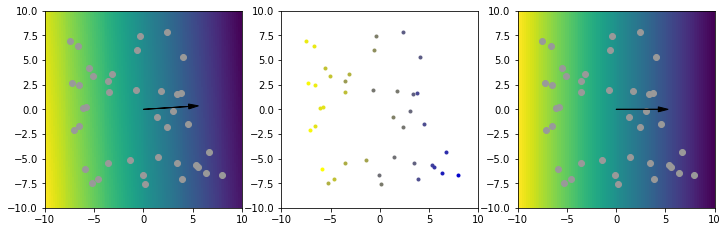

In [9]:
plt.rcParams['figure.figsize'] = (12.0, 4.0)

ax = plt.subplot(1,3,1)
z = plot_lg_pdf(phi, nres)
plt.scatter(xs[1], xs[2], color=(0.6, 0.6, 0.6))

plt.subplot(1,3,2)
for i in range(ns):
    plt.plot(xs[1, i], xs[2, i], '.', color=tuple(clrs[i]))
plt.axis('square')
plt.xlim(-10, 10)
plt.ylim(-10, 10)

plt.subplot(1,3,3)
z = plot_lg_pdf(mu_sel, nres)
plt.scatter(xs[1], xs[2], color=(0.6, 0.6, 0.6))

In [10]:
error_grd = (smp - grd.T).std()
inf = np.dot(mu_sel[np.newaxis, :], xs_sel)
error_inf = (smp - inf.T).std()
print('error of the generated sample relative to ground truth = {:1.4f}'.format(error_grd))
print('error of the generated sample relative to inference    = {:1.4f}'.format(error_inf))

error of the generated sample relative to ground truth = 1.0139
error of the generated sample relative to inference    = 1.0229
